In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('adult_data.csv')

In [4]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,house_per_week,native_country,target
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 16)

In [6]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,house_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education-num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  house_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  target          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 2.9+ MB


In [8]:
df.isnull().sum()

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
house_per_week    0
native_country    0
target            0
dtype: int64

In [9]:
x=df.drop(['target'],axis=1)
y=df['target']

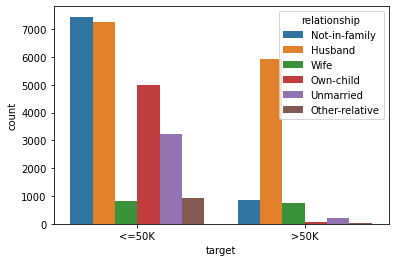

In [12]:
sns.countplot(df['target'],hue='relationship',data=df)

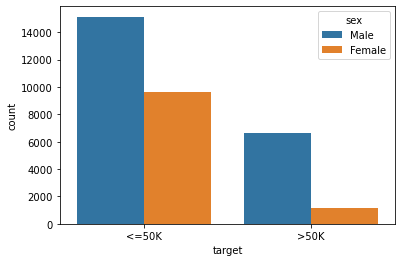

In [13]:
sns.countplot(df['target'],hue='sex',data=df)

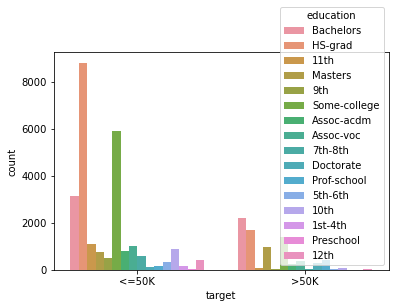

In [14]:
sns.countplot(df['target'],hue='education',data=df)

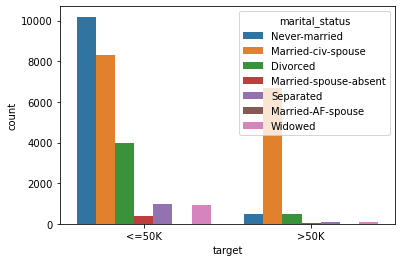

In [15]:
sns.countplot(df['target'],hue='marital_status',data=df)

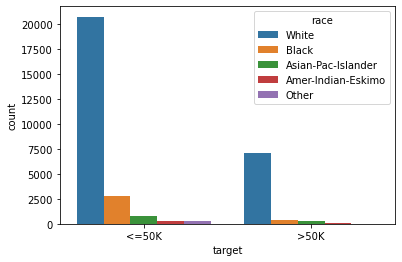

In [16]:
sns.countplot(df['target'],hue='race',data=df)

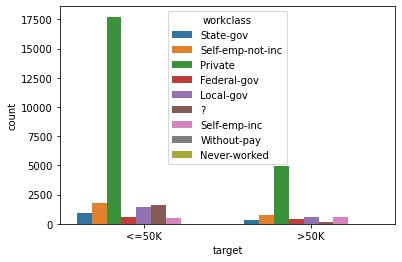

In [17]:
sns.countplot(df['target'],hue='workclass',data=df)

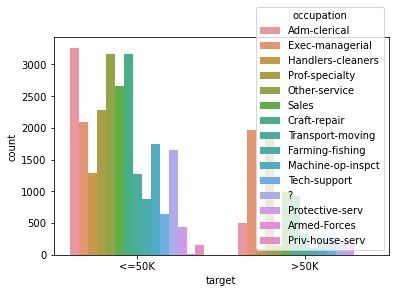

In [21]:
sns.countplot(df['target'],hue='occupation',data=df)

In [12]:
x.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,house_per_week,native_country
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
from sklearn import preprocessing
categorical=['workclass','education','marital_status','occupation','relationship','race','sex','native_country'];
for feature in categorical:
    le=preprocessing.LabelEncoder();
    x_train[feature]=le.fit_transform(x_train[feature]);
    x_test[feature]=le.transform(x_test[feature])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler();
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x.columns);
x_test=pd.DataFrame(scaler.transform(x_test),columns=x.columns);

In [16]:
x_train.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,house_per_week,native_country
0,1.688183,0.470399,0.091645,-0.174981,0.179166,-0.414963,-0.409687,-0.842289,-0.898445,0.396164,0.701715,0.826332,-0.216969,1.589744,0.290103
1,0.954617,0.617346,2.157698,-0.763517,0.179166,-0.414963,-1.738219,-1.315337,1.591127,0.396164,-1.425079,0.098582,-0.216969,-0.200583,0.290103
2,0.772077,0.690820,0.091645,-0.017034,1.216323,-0.025832,-0.409687,1.286425,-0.898445,0.396164,0.701715,-0.145156,-0.216969,0.775959,0.290103
3,-0.411932,-0.705178,0.091645,-0.415016,0.179166,-0.414963,0.918845,-0.842289,-0.276052,0.396164,0.701715,-0.145156,-0.216969,-0.037826,-3.019607
4,-0.977433,-1.146019,0.091645,0.130127,-1.376570,-2.360620,0.918845,-0.842289,-0.276052,0.396164,0.701715,-0.145156,-0.216969,-1.258503,-3.274200


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression();
logreg.fit(x_train,y_train);
y_pred=logreg.predict(x_test);
print('logistic regression accuracy score:{0:0.4f}'.format(accuracy_score(y_test,y_pred)));

logistic regression accuracy score:0.8244


In [18]:
from sklearn.decomposition import PCA
pca=PCA();
x_train=pca.fit_transform(x_train);
pca.explained_variance_ratio_

array([0.14128604, 0.09458849, 0.08417257, 0.07499352, 0.07126291,
       0.06862947, 0.06667017, 0.06386136, 0.06219203, 0.05674801,
       0.05571001, 0.0500304 , 0.0453813 , 0.03896599, 0.02550774])

In [19]:
x=df.drop(['target'],axis=1);
y=df['target'];
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0);
categorical=['workclass','education','marital_status','occupation','relationship','race','sex','native_country'];
for feature in categorical:
    le=preprocessing.LabelEncoder();
    x_train[feature]=le.fit_transform(x_train[feature]);
    x_test[feature]=le.transform(x_test[feature]);
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x.columns);
pcs=PCA();
pca.fit(x_train);
cumsum=np.cumsum(pca.explained_variance_ratio_)
dimension=np.argmax(cumsum>=0.90)+1
print('the number of dimensions required to preserve 90% of variance is',dimension)

the number of dimensions required to preserve 90% of variance is 13
